In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, TimeDistributed, Flatten, Conv1D, MaxPooling1D
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

from forecaster import Forecaster
import matplotlib.pyplot as plt
plt.style.use('default')

2023-09-08 12:07:33.669741: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-08 12:07:33.669835: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-08 12:07:35.902367: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-09-08 12:07:35.902650: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-09-08 12:07:35.902663: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [3]:
df = pd.read_csv('TSLA.csv', parse_dates = ['Date'])

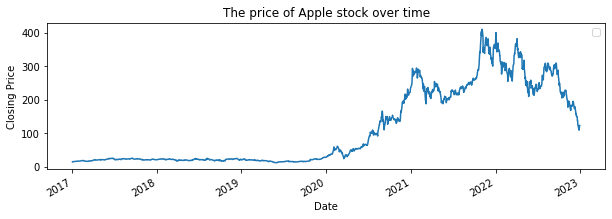

In [4]:
ax = df.plot(x='Date', y='Close', figsize = (10, 3))
ax.set_ylabel('Closing Price')
ax.set_title('The price of Apple stock over time')
ax.legend([])

In [5]:
df = df[['Date', 'Close']]

In [6]:
forecaster = Forecaster(
    df,
    x = 'Date',
    y = 'Close'
)

,Training score,Test score
Ridge,5.353818,0.435719


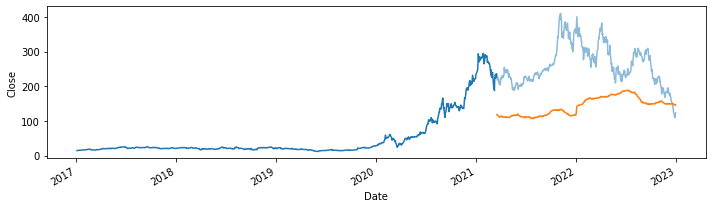

In [51]:
pred, score = forecaster.validate(Ridge(), seasonality = True, plot = True)

,Training score,Test score
XGBRegressor,0.775199,0.180389


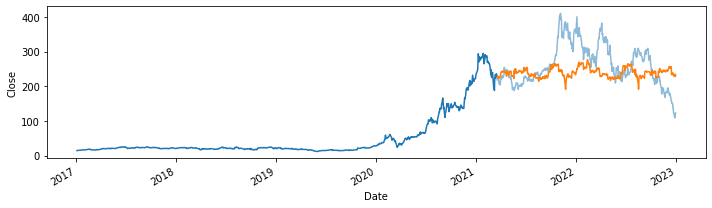

In [52]:
pred, score = forecaster.validate(XGBRegressor(), seasonality = True, plot = True)

2023-09-08 12:07:44.991679: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-08 12:07:44.992217: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-08 12:07:44.992258: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (seshdesktop): /proc/driver/nvidia/version does not exist


,Training score,Test score
GRU,0.889927,0.300974


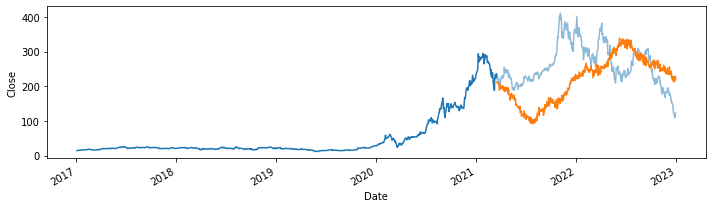

In [7]:
model = Sequential([
    GRU(units = 60),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 60).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
LSTM,0.838146,0.326408


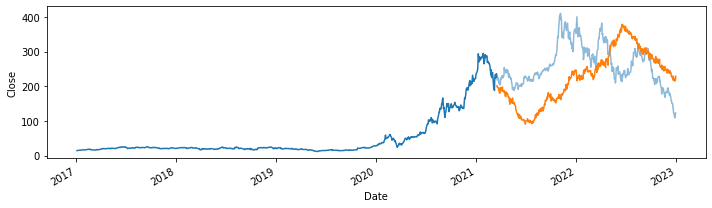

In [8]:
model = Sequential([
    LSTM(units = 60),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model,          
    seasonality = True, 
    #lag = np.arange(1, 60).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
LSTM,0.847666,0.290464


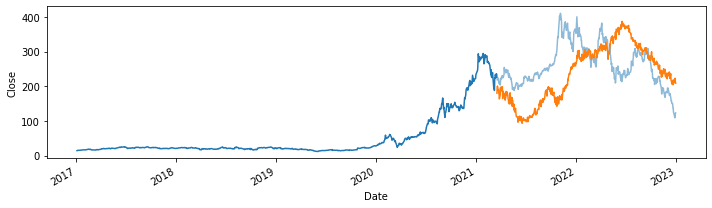

In [13]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    LSTM(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 60).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
GRU,0.836681,0.304491


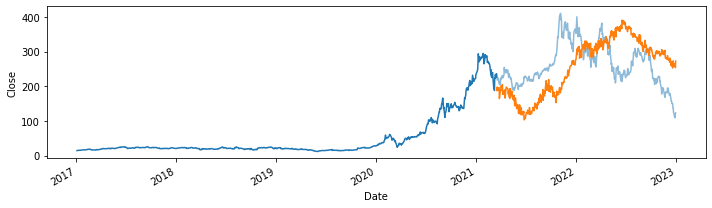

In [15]:
model = Sequential([
    GRU(units = 60, return_sequences = True),
    Dropout(0.1),
    GRU(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 60).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
LSTM,0.849834,0.329122


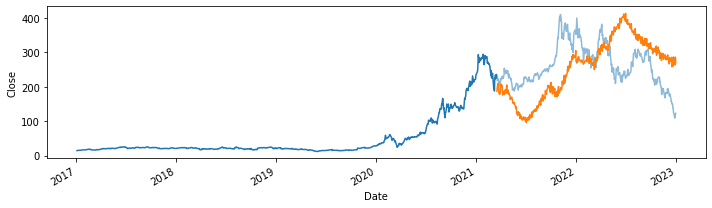

In [16]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    GRU(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM_GRU')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 60).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
Conv1D,0.912709,0.353287


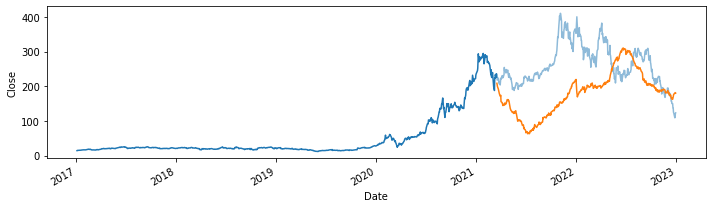

In [17]:
model = Sequential([
    Conv1D(filters = 128, kernel_size = 11, activation = 'relu'),
    MaxPooling1D(pool_size = 2),
    Flatten(),
    Dense(units = 1)
], name = 'CNN')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 7).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
Conv1D,0.836479,0.556105


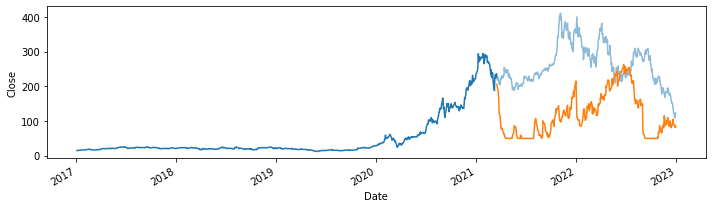

In [18]:
model = Sequential([
    Conv1D(filters = 128, kernel_size = 11, activation = 'relu'),
    MaxPooling1D(pool_size = 2),
    GRU(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'CNN')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 7).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

  0%|          | 0/453 [00:00<?, ?it/s]

,Training score,Test score
LSTM,1.188783,0.239197


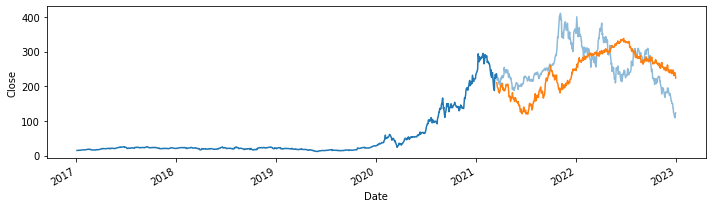

In [19]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    LSTM(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    lag = np.arange(1, 2).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

  0%|          | 0/453 [00:00<?, ?it/s]

,Training score,Test score
LSTM,0.844906,0.17555


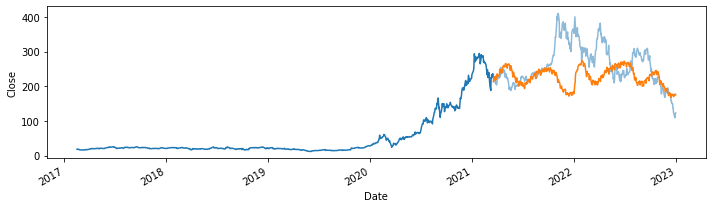

In [20]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    LSTM(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    lag = np.arange(1, 31).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

  0%|          | 0/453 [00:00<?, ?it/s]

,Training score,Test score
LSTM,0.807998,0.198578


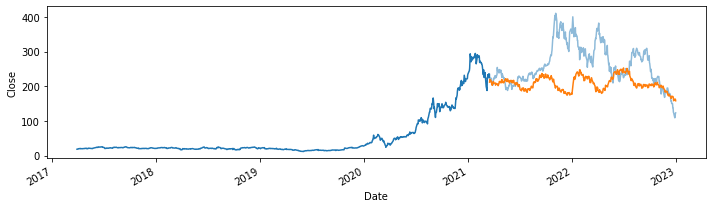

In [21]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    LSTM(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    lag = np.arange(1, 61).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

  0%|          | 0/453 [00:00<?, ?it/s]

,Training score,Test score
LSTM,0.825503,0.188168


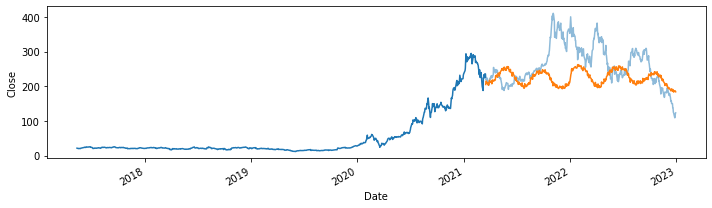

In [22]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    LSTM(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    lag = np.arange(1, 91).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)